# Loan Eligibility Prediction

*Importing Libraries*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

*Loading DataSet for Training And Testing*

In [2]:
df_train = pd.read_csv('loan-train.csv')
df_test = pd.read_csv('loan-test.csv')
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Data Preprocessing & EDA

*Converting Loan_Status Categorical Column Into Binary(0,1)*

In [4]:
df_train.replace(to_replace=['Y'],value=1,inplace=True)
df_train.replace(to_replace=['N'],value=0,inplace=True)
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [5]:
df_ob=df_train.select_dtypes(include = ['object'])
cat_col = ((df_ob.nunique()).index.tolist())
cat_col

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

<Axes: >

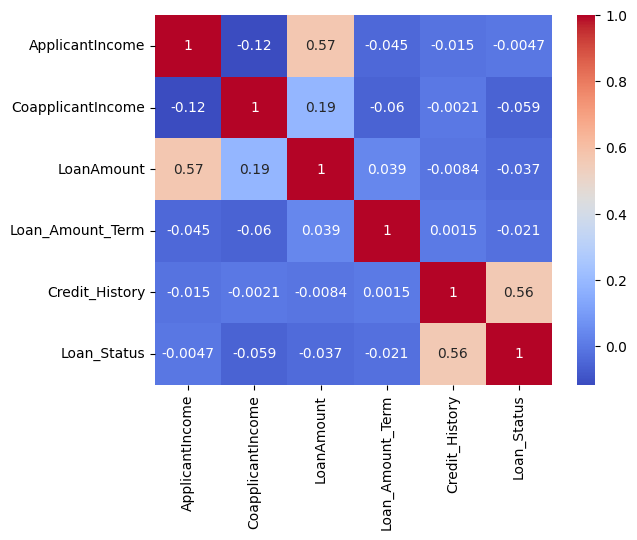

In [6]:
sns.heatmap((df_train.drop(cat_col,axis=1)).corr(),cmap='coolwarm',annot=True)

In [7]:
y = df_train['Loan_Status']
df_train = df_train.drop(['Loan_ID','Loan_Status'],axis=1)
df_test = df_test.drop(['Loan_ID'],axis=1)

*One-hot Encoding on Categorical Columns*

In [8]:
cat_col.remove('Loan_ID')
df_train_encoded = pd.get_dummies(df_train, columns=cat_col)
df_test_encoded = pd.get_dummies(df_test,columns=cat_col)

*Checking The total Null Values In DataSet*

In [9]:
df_train_encoded.isnull().sum().sum()

86

In [10]:
df_test_encoded.isnull().sum().sum()

40

*Filling The null Values With Mean Of there respective Columns*

In [11]:
def na_filler(df):
    Col_w_Nv = df.columns[df.isnull().any()]
    for c in Col_w_Nv:
        df[c].fillna(df[c].mean(),inplace=True)
na_filler(df_train_encoded) 
na_filler(df_test_encoded)

In [12]:
df_train_encoded.isnull().sum().sum()

0

In [13]:
df_test_encoded.isnull().sum().sum()

0

## *Checking Correlation Between Variables And Features*

<Axes: >

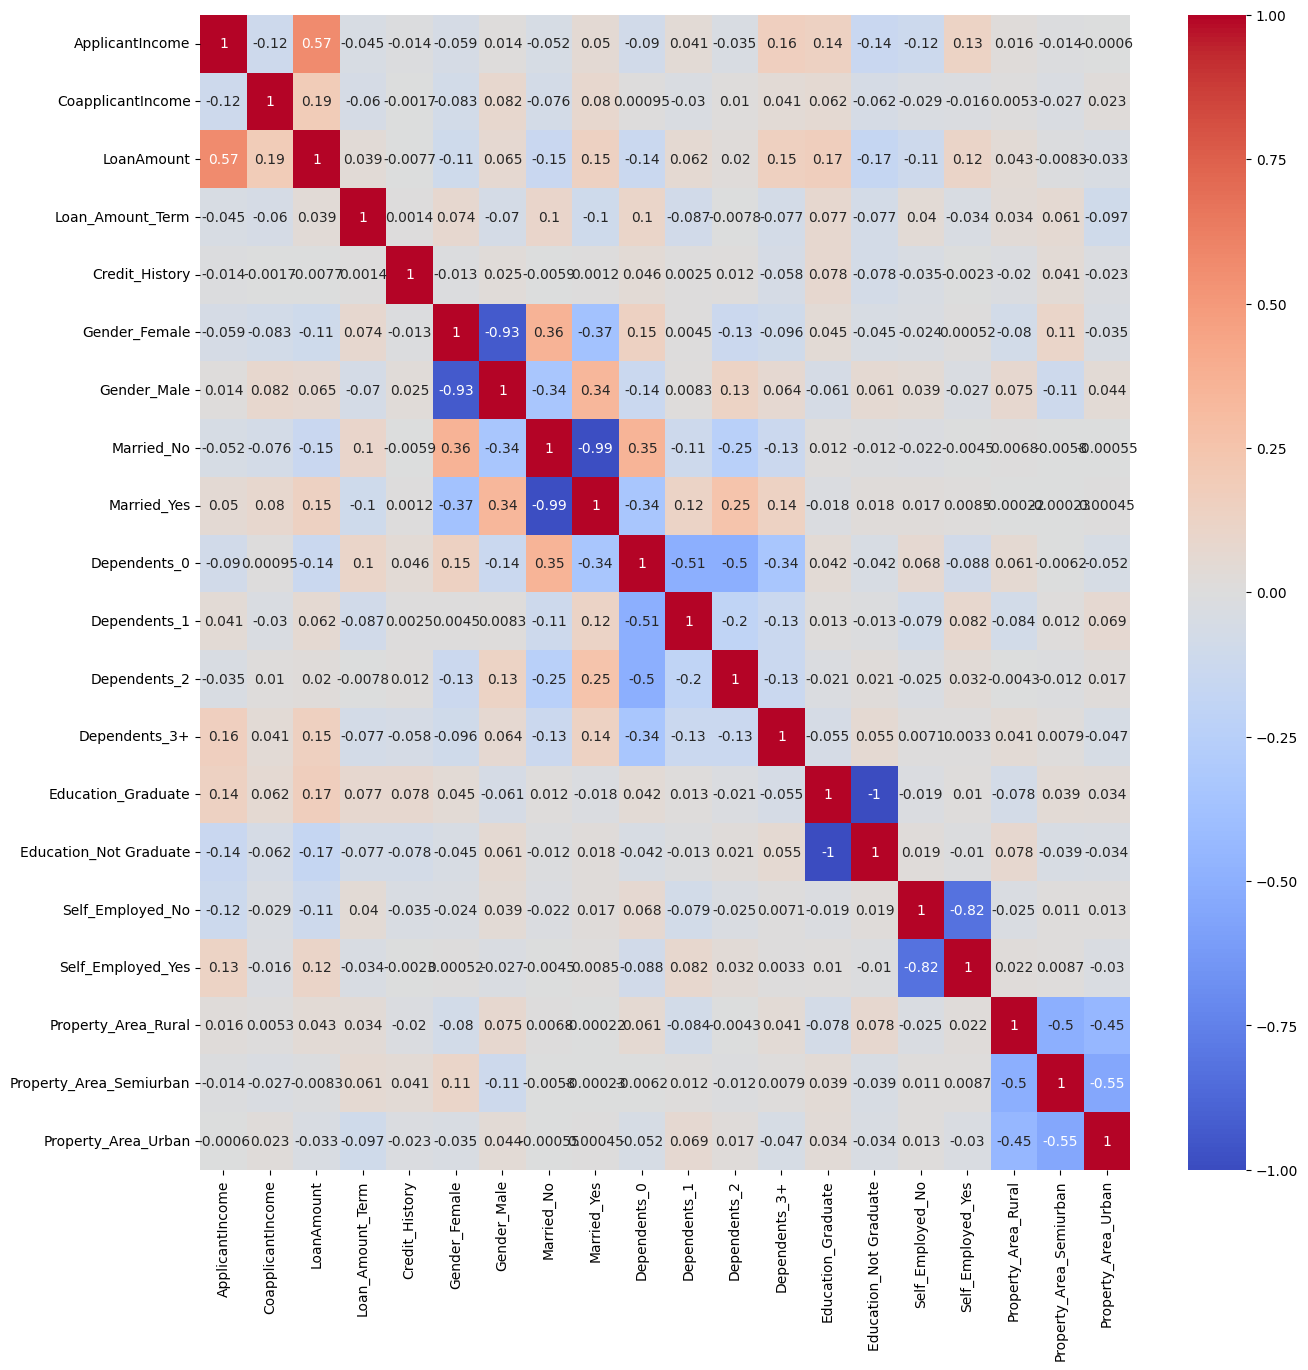

In [14]:
plt.figure(figsize=(15,15))
sns.heatmap((df_train_encoded).corr(),cmap='coolwarm',annot=True)

# Model Training

In [15]:
from sklearn.linear_model import LogisticRegression
Lr = LogisticRegression()
Lr.fit(df_train_encoded,y)

LogisticRegression()

In [16]:
predictions = Lr.predict(df_test_encoded)

## *Predictions on test Dataset are Embedded Back To The Dataset*

In [17]:
df_test_encoded['Pred_Loan_Status'] = predictions
df_test_encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Pred_Loan_Status
0,5720,0,110.0,360.0,1.000000,False,True,False,True,True,...,False,False,True,False,True,False,False,False,True,1
1,3076,1500,126.0,360.0,1.000000,False,True,False,True,False,...,False,False,True,False,True,False,False,False,True,1
2,5000,1800,208.0,360.0,1.000000,False,True,False,True,False,...,True,False,True,False,True,False,False,False,True,1
3,2340,2546,100.0,360.0,0.825444,False,True,False,True,False,...,True,False,True,False,True,False,False,False,True,1
4,3276,0,78.0,360.0,1.000000,False,True,True,False,True,...,False,False,False,True,True,False,False,False,True,1
